# Data Collection

In [12]:
from supabase import create_client

url = "your-url"
key = "your-api-key"

client = create_client(url, key)

In [17]:
import pandas as pd

result = client.from_('merged_students').select('*').execute()
data = result.data  # Extract the data from the result

# Convert to DataFrame
df = pd.DataFrame(data)

In [18]:
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,eng_average,csubj1_average,csubj2_average,csubj3_average,overall_average,grade,waec_grade,csubj1_absences,csubj2_absences,csubj3_absences
0,GP,F,16,U,GT3,T,4,4,other,other,...,63,64,64,64,64,B,PASS,5,5,5
1,GP,F,16,U,GT3,T,4,4,services,services,...,66,67,67,67,67,B,PASS,8,8,8
2,GP,F,16,U,GT3,T,4,4,teacher,services,...,78,73,71,72,72,A,PASS,2,2,2
3,GP,F,16,U,LE3,A,3,3,other,services,...,63,60,59,60,59,C,PASS,8,9,10
4,GP,F,16,U,LE3,T,1,1,at_home,at_home,...,53,59,62,61,60,B,PASS,3,3,3


In [19]:
main_df=df

In [20]:
# Set Pandas to display all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [24]:
# Check your column names
main_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'mat_absences', 'mat_ss2_3rd', 'mat_ss3_1st', 'mat_ss3_2nd',
       'eng_absences', 'eng_ss2_3rd', 'eng_ss3_1st', 'eng_ss3_2nd',
       'student_id', 'csubj1_ss2_3rd', 'csubj1_ss3_1st', 'csubj1_ss3_2nd',
       'csubj2_ss2_3rd', 'csubj2_ss3_1st', 'csubj2_ss3_2nd', 'csubj3_ss2_3rd',
       'csubj3_ss3_1st', 'csubj3_ss3_2nd', 'mat_average', 'eng_average',
       'csubj1_average', 'csubj2_average', 'csubj3_average', 'overall_average',
       'grade', 'waec_grade', 'csubj1_absences', 'csubj2_absences',
       'csubj3_absences'],
      dtype='object')

# EDA

In [29]:
# Check the data types and for null values
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           382 non-null    object
 1   sex              382 non-null    object
 2   age              382 non-null    int64 
 3   address          382 non-null    object
 4   famsize          382 non-null    object
 5   pstatus          382 non-null    object
 6   medu             382 non-null    int64 
 7   fedu             382 non-null    int64 
 8   mjob             382 non-null    object
 9   fjob             382 non-null    object
 10  reason           382 non-null    object
 11  guardian         382 non-null    object
 12  traveltime       382 non-null    int64 
 13  studytime        382 non-null    int64 
 14  failures         382 non-null    int64 
 15  schoolsup        382 non-null    object
 16  famsup           382 non-null    object
 17  paid             382 non-null    ob

In [6]:
# Check the data statistics
main_df.describe()

,age,health_status,absences,travel_time,study_time,freetime,goout_friends,m_education,f_education,maths_term1,...,english_avg,biology_term1,biology_term2,biology_term3,biology_avg,yoruba_term1,yoruba_term2,yoruba_term3,yoruba_avg,failures
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,3.578534,5.319372,1.442408,2.034031,3.222513,3.112565,2.806283,2.565445,54.342797,...,57.399487,54.875027,55.032792,56.499498,55.469106,46.896646,48.841472,47.137927,47.625348,6.060209
std,1.173470,1.400360,7.625251,0.695378,0.845798,0.988233,1.131927,1.086381,1.096240,26.760702,...,17.068074,29.680293,29.529278,29.559876,22.443554,28.188325,28.733049,28.544256,22.772556,2.258617
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000
25%,16.000000,3.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,28.392483,...,45.753649,22.106790,21.465287,23.978821,34.536532,20.000000,20.000000,20.000000,25.885804,4.000000
50%,17.000000,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,52.848063,...,56.365170,53.122067,51.921888,56.408372,58.716890,34.455689,40.313054,36.059172,44.671744,6.000000
75%,17.000000,5.000000,8.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,77.914324,...,68.816044,89.261250,88.713790,89.733929,71.948315,69.867963,75.373524,72.999663,64.614381,8.000000
max,22.000000,5.000000,75.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,12.000000


Based on the above information we have 43 columns with no missing values. There are three data types in this dataset: float64, int64 and object.

Next we proceed to encoding of categorical variables maybe some feature scaling and engineering.

# Data Wrangling

In [30]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [31]:
# Identify categorical features (excluding 'student_id', 'parent_id', and 'waec')
categorical_features = [col for col in main_df.select_dtypes(include=['object']).columns if col not in ['student_id', 'waec_grade']]

# Identify numerical features (excluding 'waec')
numerical_features = main_df.select_dtypes(exclude=['object']).columns.tolist()

# Define the transformers
transformers = [
    ('onehot', OneHotEncoder(), categorical_features),  # One-hot encode categorical features
    ('scaler', StandardScaler(), numerical_features)     # Scale numerical features
]

# Create the column transformer
preprocessor = ColumnTransformer(transformers=transformers)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
# Fit and transform the features
main_df_transformed = pipeline.fit_transform(main_df)

In [9]:
# Get the feature names after transformation
# Get the one-hot encoded feature names
onehot_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)

# For scaled numerical features, use the original column names
scaled_columns = numerical_features  

# Combine the new column names
all_columns = list(onehot_columns) + scaled_columns

# Create a DataFrame with the transformed data
main_df_transformed = pd.DataFrame(main_df_transformed, columns=all_columns)

In [10]:
# Assuming main_df contains the original columns
original_columns = main_df[['waec', 'student_id', 'parent_id']]

# Concatenate the original columns with the transformed DataFrame
main_df_transformed = pd.concat([main_df_transformed, original_columns.reset_index(drop=True)], axis=1)

# Verify the columns are added
main_df_transformed.head()

,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,reason_course,reason_home,reason_other,reason_reputation,...,biology_term3,biology_avg,yoruba_term1,yoruba_term2,yoruba_term3,yoruba_avg,failures,waec,student_id,parent_id
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.304166,0.710770,-0.917105,-0.452012,-0.206534,-0.654804,1.303296,FAIL,ID 001,PID 001
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-1.236384,-0.061123,-0.409198,1.552051,-0.951978,0.086171,0.416637,PASS,ID 002,PID 002
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.304166,1.092888,-0.955428,-1.005090,-0.951978,-1.214689,0.859966,FAIL,ID 003,PID 003
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.595805,-1.301211,1.252861,-0.568888,-0.951978,-0.120077,0.416637,FAIL,ID 004,PID 004
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.304166,0.884837,-0.485979,-0.964743,-0.607169,-0.859955,1.303296,PASS,ID 005,PID 005


# Logistic Regression

Note: This is the chosen model and has been moved to the top

Cross-validation scores: [0.98507463 0.95522388 0.97014925 0.98484848]
Mean cross-validation score: 0.9738240615106286


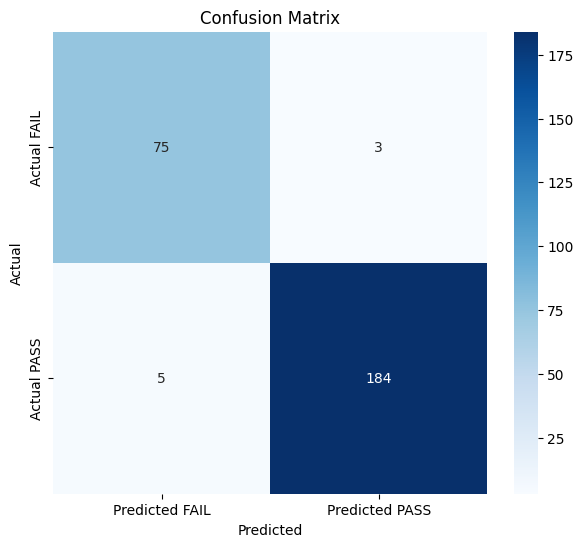

              precision    recall  f1-score   support

        FAIL       0.94      0.96      0.95        78
        PASS       0.98      0.97      0.98       189

    accuracy                           0.97       267
   macro avg       0.96      0.97      0.96       267
weighted avg       0.97      0.97      0.97       267



In [32]:
# Let's build a model
# Import statements
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ]
)

# Create the pipeline with logistic regression and set the best parameters
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.1, solver='lbfgs'))
])

# Assuming main_df is defined and contains the data
# Split the data into features and target
X = main_df.drop(columns=['waec_grade'])
y = main_df['waec_grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Perform cross-validation and get scores
y_pred = cross_val_predict(pipeline_lr, X_train, y_train, cv=5)
cv_scores = cross_val_score(pipeline_lr, X_train, y_train, cv=4)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
labels = ['FAIL', 'PASS']
cm_df = pd.DataFrame(cm, index=[f'Actual {label}' for label in labels], columns=[f'Predicted {label}' for label in labels])

plt.figure(figsize=(7, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_train, y_pred, target_names=['FAIL', 'PASS'])
print(report)

Let's find out the coeffcients the model uses most to make its decisions

In [33]:
# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Get the logistic regression model from the pipeline
logistic_model = pipeline_lr.named_steps['classifier']

# Get the feature names after preprocessing
feature_names = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for the coefficients
coefficients = pd.DataFrame(logistic_model.coef_.flatten(), index=feature_names, columns=['Coefficient'])

# Print the coefficients
print(coefficients)

                           Coefficient
onehot__school_GP            -0.032291
onehot__school_MS             0.032150
onehot__sex_F                 0.126791
onehot__sex_M                -0.126932
onehot__address_R            -0.084421
onehot__address_U             0.084280
onehot__famsize_GT3          -0.031506
onehot__famsize_LE3           0.031365
onehot__pstatus_A             0.042599
onehot__pstatus_T            -0.042740
onehot__mjob_at_home         -0.052963
onehot__mjob_health           0.002009
onehot__mjob_other            0.069591
onehot__mjob_services        -0.042284
onehot__mjob_teacher          0.023507
onehot__fjob_at_home          0.032926
onehot__fjob_health           0.029758
onehot__fjob_other            0.002031
onehot__fjob_services        -0.068351
onehot__fjob_teacher          0.003495
onehot__reason_course        -0.021740
onehot__reason_home           0.072974
onehot__reason_other         -0.028360
onehot__reason_reputation    -0.023015
onehot__guardian_father  

In [34]:
import os
import joblib
os.makedirs('saved_models', exist_ok=True)
joblib.dump(pipeline_lr, 'saved_models/pipeline_lr')

['saved_models/pipeline_lr']